In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle
import joblib


In [2]:
df = pd.read_csv("Bank.csv")

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [5]:
df.shape

(10000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

drop columns

In [9]:
df = df.drop(["RowNumber", "CustomerId", "Surname" ,"Complain"], axis=1)

In [10]:
df = df.rename(columns={
    'Satisfaction Score': 'Satisfaction_Score',
    'Card Type': 'Card_Type',
    'Point Earned': 'Points_Earned'
})

missing values



In [11]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction_Score    0
Card_Type             0
Points_Earned         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
num_cols = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "EstimatedSalary",
    "Satisfaction_Score","HasCrCard",
    "IsActiveMember", "Points_Earned"]


In [14]:
cat_cols = ["Geography", "Gender", "Card_Type"]

In [15]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    count = outliers.shape[0]
    percent = (count / len(df)) * 100

    print(f"\nColumn: {col}")
    print(f"Outliers: {count} ({percent:.2f}%)")



Column: CreditScore
Outliers: 15 (0.15%)

Column: Age
Outliers: 359 (3.59%)

Column: Tenure
Outliers: 0 (0.00%)

Column: Balance
Outliers: 0 (0.00%)

Column: NumOfProducts
Outliers: 60 (0.60%)

Column: EstimatedSalary
Outliers: 0 (0.00%)

Column: Satisfaction_Score
Outliers: 0 (0.00%)

Column: HasCrCard
Outliers: 0 (0.00%)

Column: IsActiveMember
Outliers: 0 (0.00%)

Column: Points_Earned
Outliers: 0 (0.00%)


In [16]:
df["Card_Type"] = df["Card_Type"].map({
    "GOLD": 1,
    "SILVER": 2,
    "PLATINUM": 3,
    "DIAMOND": 4
})


In [17]:
df["Geography"] = df["Geography"].map({"France": 0, "Spain": 1, "Germany": 2})

In [18]:
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop( ['Exited'], axis=1)
y = df["Exited"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



In [20]:
from sklearn.preprocessing import LabelEncoder
import pickle

cat_cols = ['Geography', 'Gender', 'Card_Type']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le



In [21]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


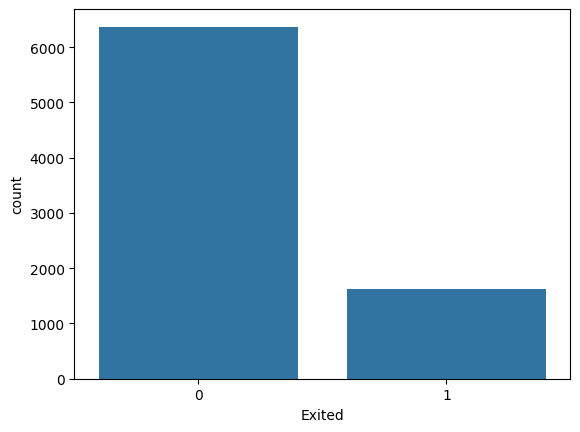

In [22]:
sns.countplot(x=y_train)
plt.show()

In [2]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils.validation' (C:\Users\mooda\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py)

<Axes: xlabel='Exited', ylabel='count'>

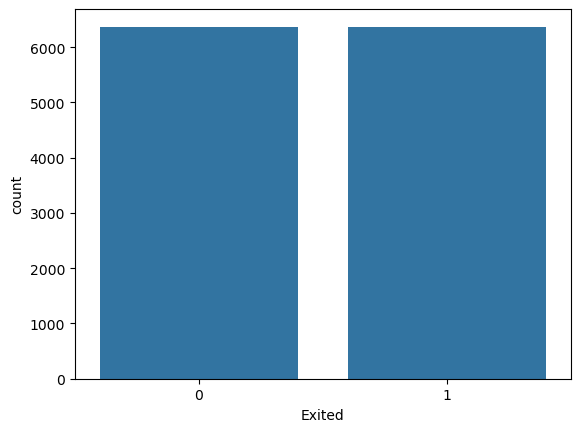

In [ ]:
sns.countplot(x=y_train_res)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_res, y_train_res)
y_pred = lr_model.predict(X_test)

# Evaluate
print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.709
ROC-AUC: 0.711486353335304
Confusion Matrix:
 [[1126  466]
 [ 116  292]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.79      1592
           1       0.39      0.72      0.50       408

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.73      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train_res, y_train_res)
y_pr = rf_model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pr))
print("Classification Report:")
print(classification_report(y_test, y_pr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pr))

Accuracy: 0.8435
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1592
           1       0.63      0.57      0.60       408

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
[[1453  139]
 [ 174  234]]


In [ ]:

with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)



In [ ]:
with open("label_encoder.pkl", "wb") as encode_file:
     pickle.dump(label_encoders)

In [ ]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)


2nd target


In [ ]:
loyalty_features = ["CreditScore", "Tenure", "Balance", "Points_Earned", "Card_Type", "HasCrCard"]
X_loyalty = df[loyalty_features]
y_loyalty = df["Loyalty_Class"]

In [ ]:
X_train_loyalty, X_test_loyalty, y_train_loyalty, y_test_loyalty = train_test_split(
    X_loyalty, y_loyalty, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_loyalty = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train
gb_loyalty.fit(X_train_loyalty, y_train_loyalty)
# Predict on test set
y_pred_loyalty = gb_loyalty.predict(X_test_loyalty)

# Check accuracy
loyalty_acc = gb_loyalty.score(X_test_loyalty, y_test_loyalty)
print(f"Loyalty Class Model Accuracy: {loyalty_acc:.2f}")
cm = confusion_matrix(y_test_loyalty, y_pred_loyalty, labels=["Low", "Medium", "High"])
print("Confusion Matrix:")
print(cm)


Loyalty Class Model Accuracy: 1.00
Confusion Matrix:
[[652   1   0]
 [  2 664   1]
 [  0   2 678]]


In [ ]:
import pickle

with open("model_loyalty.pkl", "wb") as f:
    pickle.dump(gb_loyalty, f)